In [19]:
import numpy as np
import pandas
data = pandas.read_csv("https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675",
               sep = ';', 
               dtype = {'dep':np.str, 'P':np.int32,'T':np.int32,'cl_age90':np.int32},
                parse_dates = ['jour']
               )

In [20]:
isere = data.loc[data['dep'] == '38']

testedIsereAllAges = isere.groupby(['jour'])['T'].sum()
positifIsereAllAges = isere.groupby(['jour'])['P'].sum()
#print(isere)
#print(testedIsereAllAges)
#print(positifIsereAllAges)

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
fig = plt.figure()
#ax = fig.add_axes([0,0,100,200])
#ax.plot(data)
#testedIsereAllAges.plot(x='jour', y='T')
#testedIsereAllAges.ewm(span = 7).mean().plot(x='jour')
#print(data.dtypes)



<Figure size 432x288 with 0 Axes>

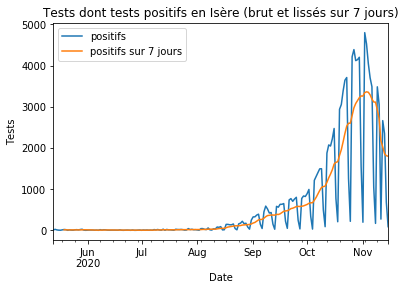

In [22]:
positifIsereAllAges2 = positifIsereAllAges#[-60:-1]
positifIsereAllAges2.plot(x='jour', y='P', label='positifs')
#positifIsereAllAges2.ewm(span = 8).mean().plot(x='jour', label='positifs sur 7 jours')
positifIsereAllAges2.rolling(7).mean().plot(x='jour', label='positifs sur 7 jours')
plt.legend()
plt.title("Tests dont tests positifs en Isère (brut et lissés sur 7 jours)")
plt.xlabel("Date")
plt.ylabel("Tests")
#data.plot(x='jour', y='T')#, ylabel='testés')
#data.plot(x='jour', y='P')#, ylabel='positifs')
plt.show()

In [23]:
print(positifIsereAllAges2[-10:])

jour
2020-11-06    3489
2020-11-07    1052
2020-11-08     168
2020-11-09    3486
2020-11-10    3058
2020-11-11     272
2020-11-12    2665
2020-11-13    2351
2020-11-14     682
2020-11-15      88
Name: P, dtype: int32


In [24]:
print("Dernières données du " + str(data.jour.unique()[-1])[:10])

Dernières données du 2020-11-15


In [25]:
dataMetros = pandas.read_csv("https://www.data.gouv.fr/fr/datasets/r/61533034-0f2f-4b16-9a6d-28ffabb33a02",
               sep = ';', 
               dtype = {'epci2020':np.str, 'ti':np.float64,'clage_65':np.int32, 'semaine_glissante':np.str},
                #parse_dates = ['semaine_glissante']
               )


In [26]:
print(dataMetros.keys())
#dataMetros
# Code EPCI de Grenoble selon https://www.data.gouv.fr/fr/datasets/r/0fa52fca-4eb3-4786-92f1-6db24273068f
grenoble = dataMetros[dataMetros.epci2020 == '200040715']
#print(grenoble)

Index(['epci2020', 'semaine_glissante', 'clage_65', 'ti'], dtype='object')


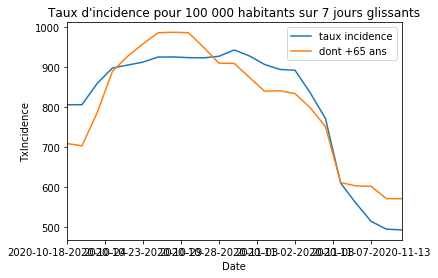

In [27]:
#print(grenoble.sort_values("semaine_glissante"))
greSorted = grenoble.sort_values("semaine_glissante")
greAll = greSorted[greSorted.clage_65 == 0]
#print(greAll)
grePlus65 = greSorted[greSorted.clage_65 != 0]
#print(grePlus65)
ax = greAll.plot(x='semaine_glissante', y='ti', label='taux incidence')
grePlus65.plot(x='semaine_glissante', y='ti', label='dont +65 ans', ax=ax)

plt.legend()
plt.title("Taux d'incidence pour 100 000 habitants sur 7 jours glissants")
plt.xlabel("Date")
plt.ylabel("TxIncidence")

plt.show()

In [28]:
# Code localisation 381850210	Ile Verte-Maréchal Randon